## Purpose

The purpose of this script is to take the embeddings generated by the VGGish model (128-D) and collapse them down into 2 or 3 dimensions for graphing. The process will be as follows:

1. Read in all the embedding files
2. Combine all embedding files
3. Run PCA over the embedding cols into 2D
4. Graph PCA results
5. Run PCA over the embedding cols into 3D
6. Graph PCA results

We will start by importing some basic python libraries.

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

First we will read in and combine all the embedding csv files.

In [47]:
#Reading in the CSV
filepath = '../../embedding_data/'
df1 = pd.read_csv(filepath+'181204-203002-437599-806141979.csv')
df2 = pd.read_csv(filepath+'181209-083002-437599-806141979.csv')
df3 = pd.read_csv(filepath+'181227-053002-437599-806141979.csv')
df4 = pd.read_csv(filepath+'181227-100002-437599-806141979.csv')

#Combining the df & dropping index col
df_list = [df1, df2, df3, df4]
combo_df = pd.concat(df_list)
combo_df.pop('Unnamed: 0')
combo_df.head()

,recording_file,example_number,start_time_s,stop_time_s,0,1,2,3,4,5,...,118,119,120,121,122,123,124,125,126,127
0,181204-203002-437599-806141979,0,0.00,0.96,-0.596139,-0.013254,0.106211,0.147045,-0.051310,-0.350810,...,-0.390685,0.157083,-0.189954,-0.163622,-0.260852,0.045972,0.050049,-0.561768,0.346762,-0.245712
1,181204-203002-437599-806141979,1,0.96,1.92,-0.434193,-0.137784,0.356249,-0.088093,0.162552,-0.311620,...,-0.584604,0.314118,-0.106924,0.042589,-0.160707,0.081133,-0.075917,-0.425438,0.156502,-0.336173
2,181204-203002-437599-806141979,2,1.92,2.88,-0.388765,-0.126046,0.515873,0.219143,0.148603,-0.475447,...,-0.606825,0.147044,-0.081204,-0.127222,-0.298510,0.024426,-0.079342,-0.504951,0.127083,-0.232509
3,181204-203002-437599-806141979,3,2.88,3.84,-0.628887,-0.215833,0.490722,0.029342,-0.112664,-0.627756,...,-0.822241,0.004939,-0.164778,-0.368782,-0.406374,0.263339,-0.466854,-0.423230,1.036155,-0.330243
4,181204-203002-437599-806141979,4,3.84,4.80,-0.859609,-0.165474,0.647591,0.210112,-0.179233,-0.642635,...,-0.589887,-0.255149,-0.298469,-0.564341,-0.468385,0.168558,-0.344020,-0.750663,1.204428,-0.267848


Now we will run PCA over the combined dataframe, breaking it down into 2D.

In [48]:
#Breaking down data and standardizing
sc = StandardScaler()
embeddings = combo_df.iloc[:, 4:]
sc.fit(embeddings)
embeddings_scaled = sc.transform(embeddings)

#Getting PCA components
pca = PCA(n_components = 2) #Setting up PCA for first 2 components
pca.fit(embeddings_scaled)
embeddings_pca = pca.transform(embeddings_scaled)

#Examining outputs
explained_variance = pca.explained_variance_ratio_
print("The explained variance of the first 2 components is {0}%".format(round(sum(explained_variance)*100),2))

The explained variance of the first 2 components is 33%


Now we will graph the 2D PCA reduction.

<IPython.core.display.Javascript object>


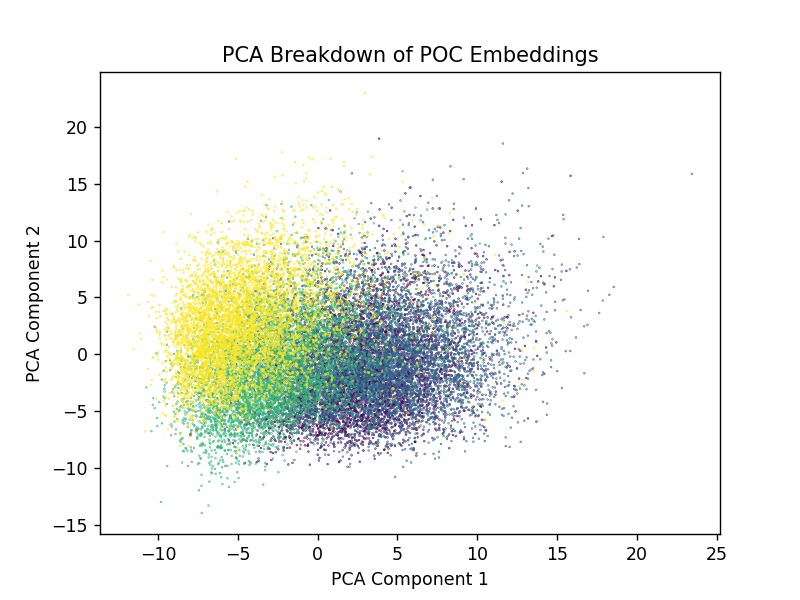

In [49]:
#Transforming the recording file labels from strings to numbers for graph coloring
labels = combo_df['recording_file']
int_labels = []
for label in labels:
    if label == '181204-203002-437599-806141979':
        int_labels.append(1)
    elif label == '181209-083002-437599-806141979':
        int_labels.append(2)
    elif label == '181227-053002-437599-806141979':
        int_labels.append(3)
    elif label == '181227-100002-437599-806141979':
        int_labels.append(4)
    else:
        print("ERROR - rogue label")

#Graphing
plt.scatter(embeddings_pca[:,0], embeddings_pca[:,1], s=0.1, c=int_labels)
plt.title('PCA Breakdown of POC Embeddings')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

The above graph is pretty overlapping. We'll now run PCA in 3D to see if it improves the quality of visualization.

In [50]:
#Breaking down data and standardizing
sc = StandardScaler()
embeddings = combo_df.iloc[:, 4:]
sc.fit(embeddings)
embeddings_scaled = sc.transform(embeddings)

#Getting PCA components
pca = PCA(n_components = 3) #Setting up PCA for first 3 components
pca.fit(embeddings_scaled)
embeddings_pca_3d = pca.transform(embeddings_scaled)

#Examining outputs
explained_variance = pca.explained_variance_ratio_
print("The explained variance of the first 3 components is {0}%".format(round(sum(explained_variance)*100),2))

The explained variance of the first 3 components is 46%


Now we will graph the data points in the 3-D PCA space.

<IPython.core.display.Javascript object>


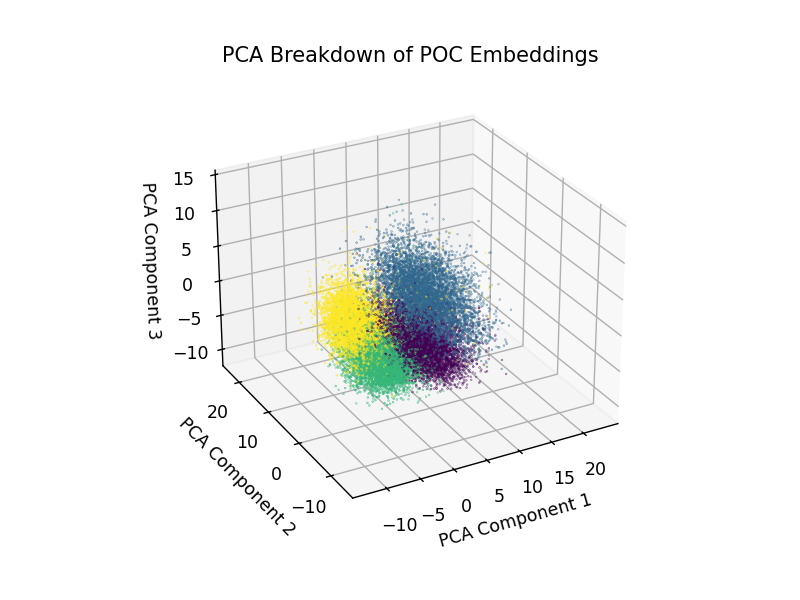

In [51]:
%matplotlib notebook

#Transforming the recording file labels from strings to numbers for graph coloring
labels = combo_df['recording_file']
int_labels = []
for label in labels:
    if label == '181204-203002-437599-806141979':
        int_labels.append(1)
    elif label == '181209-083002-437599-806141979':
        int_labels.append(2)
    elif label == '181227-053002-437599-806141979':
        int_labels.append(3)
    elif label == '181227-100002-437599-806141979':
        int_labels.append(4)
    else:
        print("ERROR - rogue label")

#Graphing
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(embeddings_pca_3d[:,0], embeddings_pca_3d[:,1], embeddings_pca_3d[:,2], s=0.1, c=int_labels)

ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.set_zlabel('PCA Component 3')
plt.title('PCA Breakdown of POC Embeddings')
plt.show()

The PCA calculations above capture a relatively small amount of variance explained. How many components would it take to capture 95?

In [53]:
#Breaking down data and standardizing
sc = StandardScaler()
embeddings = combo_df.iloc[:, 4:]
sc.fit(embeddings)
embeddings_scaled = sc.transform(embeddings)

#Getting PCA components
pca = PCA(n_components = 0.95) #Setting up PCA to get 95% of variance
pca.fit(embeddings_scaled)
embeddings_pca_3d = pca.transform(embeddings_scaled)

#Examining outputs
explained_variance = pca.explained_variance_ratio_
print("It would take {0} components to explain 95% of variance.".format(len(explained_variance)))

It would take 44 components to explain 95% of variance.
